In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.activations import relu
from keras.layers import Dense
from keras.metrics import mean_squared_logarithmic_error
from keras.callbacks import EarlyStopping,LearningRateScheduler

In [2]:
data=pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
data.drop(['Country'],inplace=True,axis=1)

In [6]:
GDP=data.GDP
data.drop(['GDP'],inplace=True,axis=1)
# data.fillna()

In [7]:
train_x,test_x,train_gdp,test_gdp=train_test_split(data,GDP,test_size=0.2,random_state=42)

In [8]:
missing_numeric_value_cols=[col for col in train_x.columns if data[col].dtype!='O' and data[col].isnull().sum()>0]

In [9]:
def fill_missing_values(dataset,columns):
    for col in columns:
        mean_value_col=np.mean(dataset[col])
#         print(mean_value_col)
        dataset[col].fillna(mean_value_col,inplace=True)
    return dataset

In [10]:
train_x=fill_missing_values(train_x,missing_numeric_value_cols)

In [11]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 456 to 860
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2350 non-null   int64  
 1   Status                           2350 non-null   object 
 2   Life expectancy                  2350 non-null   float64
 3   Adult Mortality                  2350 non-null   float64
 4   infant deaths                    2350 non-null   int64  
 5   Alcohol                          2350 non-null   float64
 6   percentage expenditure           2350 non-null   float64
 7   Hepatitis B                      2350 non-null   float64
 8   Measles                          2350 non-null   int64  
 9    BMI                             2350 non-null   float64
 10  under-five deaths                2350 non-null   int64  
 11  Polio                            2350 non-null   float64
 12  Total expenditure  

In [12]:
def fill_GDP(dataset):
    mean_gdp=np.mean(dataset)
    dataset.fillna(mean_gdp,inplace=True)
    return dataset
train_gdp=fill_GDP(train_gdp)

In [13]:
lbl_developement_status=LabelEncoder()
train_x.Status=lbl_developement_status.fit_transform(train_x.Status)

In [14]:
scaler=MinMaxScaler()
train_x=scaler.fit_transform(train_x)

# Feature Engineering on Test Data

In [15]:
test_x=fill_missing_values(test_x,missing_numeric_value_cols)
test_gdp=fill_GDP(test_gdp)
test_x.Status=lbl_developement_status.transform(test_x.Status)
test_x=scaler.transform(test_x)

# ANN

In [17]:
model=Sequential()
model.add(Dense(16,input_dim=20))
# model.add(Dense(2,activation=relu))
model.add(Dense(1))

In [18]:
def schedule(epoch,lr):
    if epoch>50:
        return 0.0001
    return 0.001
scheduler=LearningRateScheduler(schedule)
early_stop=EarlyStopping(patience=3,monitor='val_mean_squared_logarithmic_error')

In [19]:
model.compile(optimizer=keras.optimizers.RMSprop(.001),loss='mse',metrics=[mean_squared_logarithmic_error])

In [20]:
r=model.fit(train_x,train_gdp,validation_data=(test_x,test_gdp),epochs=200,callbacks=[scheduler,early_stop])


Train on 2350 samples, validate on 588 samples
Epoch 1/200
2350/2350 [==============================] - 1s 232us/step - loss: 226201066.0494 - mean_squared_logarithmic_error: 44.9141 - val_loss: 237760881.0340 - val_mean_squared_logarithmic_error: 39.4696
Epoch 2/200
2350/2350 [==============================] - 0s 95us/step - loss: 226133075.0230 - mean_squared_logarithmic_error: 34.7493 - val_loss: 237679467.5374 - val_mean_squared_logarithmic_error: 32.3376
Epoch 3/200
2350/2350 [==============================] - 0s 98us/step - loss: 226043940.6570 - mean_squared_logarithmic_error: 28.8911 - val_loss: 237571073.0884 - val_mean_squared_logarithmic_error: 27.3847
Epoch 4/200
2350/2350 [==============================] - 0s 100us/step - loss: 225934049.2800 - mean_squared_logarithmic_error: 24.7869 - val_loss: 237443556.7347 - val_mean_squared_logarithmic_error: 23.8743
Epoch 5/200
2350/2350 [==============================] - 0s 94us/step - loss: 225804076.6366 - mean_squared_logarithmi

2350/2350 [==============================] - 0s 99us/step - loss: 210474831.3157 - mean_squared_logarithmic_error: 3.5236 - val_loss: 220528518.3129 - val_mean_squared_logarithmic_error: 3.7881
Epoch 40/200
2350/2350 [==============================] - 0s 94us/step - loss: 209771504.5855 - mean_squared_logarithmic_error: 3.4613 - val_loss: 219761393.1429 - val_mean_squared_logarithmic_error: 3.7217
Epoch 41/200
2350/2350 [==============================] - 0s 94us/step - loss: 209040663.8434 - mean_squared_logarithmic_error: 3.4029 - val_loss: 218963744.8707 - val_mean_squared_logarithmic_error: 3.6596
Epoch 42/200
2350/2350 [==============================] - 0s 94us/step - loss: 208310517.5421 - mean_squared_logarithmic_error: 3.3481 - val_loss: 218162167.8912 - val_mean_squared_logarithmic_error: 3.6037
Epoch 43/200
2350/2350 [==============================] - 0s 93us/step - loss: 207568481.5319 - mean_squared_logarithmic_error: 3.3007 - val_loss: 217360001.5782 - val_mean_squared_loga

2350/2350 [==============================] - 0s 94us/step - loss: 198872589.1098 - mean_squared_logarithmic_error: 3.0437 - val_loss: 208261830.0952 - val_mean_squared_logarithmic_error: 3.2663
Epoch 79/200
2350/2350 [==============================] - 0s 91us/step - loss: 198791424.4868 - mean_squared_logarithmic_error: 3.0430 - val_loss: 208171007.2925 - val_mean_squared_logarithmic_error: 3.2653
Epoch 80/200
2350/2350 [==============================] - 0s 102us/step - loss: 198711524.2077 - mean_squared_logarithmic_error: 3.0425 - val_loss: 208081680.4898 - val_mean_squared_logarithmic_error: 3.2643
Epoch 81/200
2350/2350 [==============================] - 0s 94us/step - loss: 198628040.5430 - mean_squared_logarithmic_error: 3.0419 - val_loss: 207992653.9864 - val_mean_squared_logarithmic_error: 3.2634
Epoch 82/200
2350/2350 [==============================] - 0s 97us/step - loss: 198549123.8979 - mean_squared_logarithmic_error: 3.0415 - val_loss: 207906157.7143 - val_mean_squared_log

2350/2350 [==============================] - 0s 95us/step - loss: 195718176.3779 - mean_squared_logarithmic_error: 3.0385 - val_loss: 204797571.4286 - val_mean_squared_logarithmic_error: 3.2453
Epoch 118/200
2350/2350 [==============================] - 0s 105us/step - loss: 195636422.1957 - mean_squared_logarithmic_error: 3.0388 - val_loss: 204706782.3673 - val_mean_squared_logarithmic_error: 3.2452
Epoch 119/200
2350/2350 [==============================] - 0s 95us/step - loss: 195551297.9404 - mean_squared_logarithmic_error: 3.0390 - val_loss: 204615440.1633 - val_mean_squared_logarithmic_error: 3.2451
Epoch 120/200
2350/2350 [==============================] - 0s 89us/step - loss: 195472134.6996 - mean_squared_logarithmic_error: 3.0394 - val_loss: 204528483.9728 - val_mean_squared_logarithmic_error: 3.2451
Epoch 121/200
2350/2350 [==============================] - 0s 101us/step - loss: 195393579.5472 - mean_squared_logarithmic_error: 3.0398 - val_loss: 204439698.1224 - val_mean_square

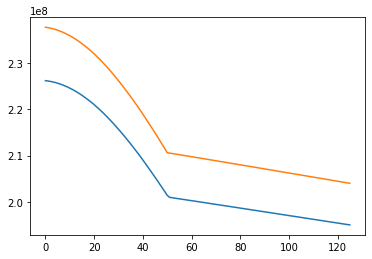

In [21]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

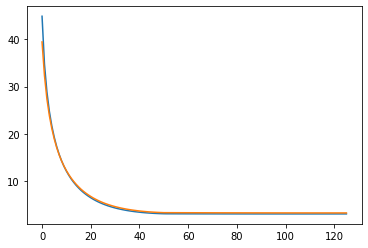

In [22]:
plt.plot(r.history['mean_squared_logarithmic_error'])
plt.plot(r.history['val_mean_squared_logarithmic_error'])

## DecisionTreeRegressor

In [23]:
model2=DecisionTreeRegressor(max_depth=10)
model2.fit(train_x,train_gdp)

DecisionTreeRegressor(max_depth=10)

In [24]:
ree=[]

In [25]:
print(mean_squared_log_error(train_gdp,model2.predict(train_x)))
print(mean_squared_log_error(test_gdp,model2.predict(test_x)))

0.2367953266893533
0.4544396086620212


In [26]:
print(mean_squared_error(train_gdp,model2.predict(train_x)))
print(mean_squared_error(test_gdp,model2.predict(test_x)))

1221197.047031186
18308820.167964753


## RandomForestRegressor

In [28]:
model3=RandomForestRegressor(max_depth=9)
model3.fit(train_x,train_gdp)

RandomForestRegressor(max_depth=9)

In [29]:
print(mean_squared_log_error(train_gdp,model3.predict(train_x)))
print(mean_squared_log_error(test_gdp,model3.predict(test_x)))

0.3448595658751586
0.439057778411219


## KNN

In [33]:
model4=KNeighborsRegressor()
model4.fit(train_x,train_gdp)

KNeighborsRegressor()

In [34]:
print(mean_squared_log_error(train_gdp,model4.predict(train_x)))
print(mean_squared_log_error(test_gdp,model4.predict(test_x)))

1.4000746225360248
2.090165773195367
